# Greenhouse Gas Emission

Greenhouse gases trap heat and make the planet warmer. These gas absorb and emit radiant energy within the thermal infrared range, causing the greenhouse effect. In the earth's atmosphere, primary greenhouse gases are carbon dioxide(CO2), methane (CH4), Nitrous oxide (N2O), ozone (O3), water vapor (H2O), and Fluorinated gases (F). In this project, we are using the dataset provided by the Climate Watch website, which contains time series data of carbon dioxide, methane, nitrous oxide, and fluorinated gas emissions from 1990 to 2018 for each country and the sectors responsible for it. The project aims to report the country that produces the most and least amount of ghg throughout these years. 


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import io
import PIL
import json

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import plotly
import plotly.offline as offline
from plotly.graph_objs import *
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

## Importing  Dataset

In [3]:
file = open("../datasets/cleaned-datasets/country_code.json")
country_code = json.load(file)

In [5]:
df_ghg = pd.read_csv("../datasets/cleaned-datasets/GHG_Country.csv", index_col="Country")
df_pop = pd.read_csv("../datasets/cleaned-datasets/Population_Dataset.csv", index_col="Country")
df_ghg_gas = pd.read_csv("../datasets/cleaned-datasets/GHG_Gas.csv", index_col = "Gas")
df_ghg_sector = pd.read_csv("../datasets/cleaned-datasets/GHG_Sector.csv", index_col = "Sector")

## Checking the percentage of each gas in Green House Gas

Gases in Green house Gas
1. Carbon di oxide (CO2)
2. Methane (CH4)
3. Nitrous oxide (N2O)
4. Fluorinated gases (F)

Below barplot shows the component of each gases for year the 2018.<br>
Contribution of Carbon dioxide is near about more than 70%

Carbon dioxide is the most important heat-trapping gas. It contributes to around 74 percent of total greenhouse gas emissions, released through human activities such as deforestation and burning fossil fuels and natural processes such as respiration and volcanic eruptions. Methane (CH4) accounts for 17 percent of the total greenhouse gases emission. The concentration of Fluorinated gas and Nitrous oxide in the atmosphere is deficient.

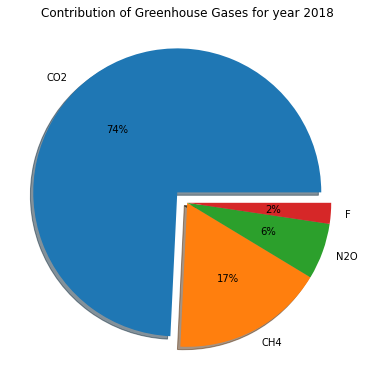

In [6]:
plt.rcParams["figure.figsize"] = (5,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode = (0.1, 0, 0, 0,)
ax.axis('equal')
colors = sns.color_palette('pastel')[0:5]
ax.pie(df_ghg_gas["2018"].to_list(), labels = df_ghg_gas.index.to_list(), shadow=True, explode = explode, autopct='%.0f%%')
plt.title("Contribution of Greenhouse Gases for year 2018")
plt.show()

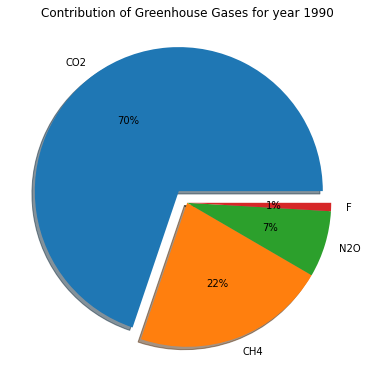

In [7]:
plt.rcParams["figure.figsize"] = (5,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode = (0.1, 0, 0, 0,)
ax.axis('equal')
colors = sns.color_palette('pastel')[0:5]
ax.pie(df_ghg_gas["1990"].to_list(), labels = df_ghg_gas.index.to_list(), shadow=True, explode = explode, autopct='%.0f%%')
plt.title("Contribution of Greenhouse Gases for year 1990")
plt.show()

## Finding the top 5 and bottom 5 Countries for GHG Emission

In [8]:
np.sum(df_ghg.iloc[1:6, -1]) *100 / df_ghg.loc["World", "2018"]

51.21441193329661

For the year 2018 about 51.25% of Green House Gas is emitted from only 5 Countries. These countries are
1. China : 24.27 %
2. United States : 12.25 %
3. India : 6.94 %
4. Russia : 4.21 %
5. Indonesia : 3.52 %

In [9]:
df_ghg_new = df_ghg.copy()
df_ghg_new = df_ghg_new * 100 / df_ghg_new.loc["World"]

**China and United States: Biggest Source of Greenhouse Gas**

China is the most populated country globally, with more than 1.4 billion people (Current status) and the largest producer of greenhouse gases 24.27%. China alone produces one-fourth of the total greenhouse gases, followed by the United States 12.25%, India 6.94%, Russia 4.21%, and Indonesia 3.52%. Half of the total ghg is generated by these countries only. China is the only country ever that crossed the boundary of 10,000 MtCO2 in 2011.


In [10]:
df_ghg_new.iloc[1:6, -3:]

,2016,2017,2018
Country,,,
China,23.987563,24.132663,24.276564
United States,12.380051,12.123066,12.250428
India,6.579159,6.774751,6.941144
Russia,4.187373,4.191718,4.219940
Indonesia,3.105873,3.096496,3.526336


**Nieu: Country with zero ghg emission**

Some countries produce significantly less volume of greenhouse gases near to zero, like Liechtenstein 0.03%, Tuvalu 0.04%, Nauru 0.11%, and Kiribati 0.11. Nieu is the only country whose ghg emission is equal to zero.


In [11]:
df_ghg_new.iloc[-5:, -3:]

,2016,2017,2018
Country,,,
Kiribati,0.000234,0.000231,0.000227
Nauru,0.000192,0.000189,0.000227
Tuvalu,0.000085,0.000084,0.000083
Liechtenstein,0.000064,0.000042,0.000062
Niue,0.000000,0.000000,0.000000


In [12]:
df_ghg_new.to_csv("../datasets/cleaned-datasets/GHG_Percent_Emission.csv")

## Calculating the GHG emission per milion population



Countries with large populations always produce more greenhouse gases than countries with smaller populations. The motive of this analysis is to find countries that produce more greenhouse gas per million population. It gives insight into the countries with smaller populations, but the volume of greenhouse gas emissions is comparably large.



In [13]:
df_ratio = df_ghg  * 1000000 / df_pop
df_ratio.sort_values(list(map(str, list(range(2018, 1989, -1)))), axis=0, inplace=True, ascending = False)
df = df_ratio[df_ratio > 0]
df.dropna(axis=0, inplace=True)

##### Top 5 countries with highest GHG Emission per million population

In [14]:
df.iloc[:5, -3:]

,2016,2017,2018
Country,,,
Singapore,42.592821,44.294154,43.971315
Brunei,40.067557,39.813325,40.120291
Qatar,37.741408,38.943351,39.163355
United Arab Emirates,36.142603,36.468060,35.108628
Bahrain,34.198513,33.197754,32.304516


##### Bottom 5 country with least GHG Emission per million population

In [15]:
df.iloc[-5:, -3:]

,2016,2017,2018
Country,,,
Comoros,0.779289,0.823207,0.804977
Liechtenstein,0.796707,0.529031,0.791181
Yemen,0.850995,0.801514,0.775474
Ghana,0.590901,0.636644,0.680281
Rwanda,0.581892,0.571740,0.558447


In [16]:
df.to_csv("../datasets/cleaned-datasets/GHG_Emission_per_million_population.csv")

## Calculating the correlation between Populaiton and GHG Emission

In [17]:
dict = {"country" : [],
        "Correlation" : []}
for country in df_ghg.index.to_list():
    if country not in df_pop.index.to_list():
        continue
    corr = df_ghg.loc[country].corr(df_pop.loc[country])
    dict["country"].append(country)
    dict["Correlation"].append(corr)
df_corr = pd.DataFrame(dict, columns=["country", "Correlation"])
df_corr.head()

,country,Correlation
0,World,0.983627
1,China,0.937431
2,United States,-0.051761
3,India,0.987483
4,Russia,0.539028


In [18]:
df_corr[df_corr["Correlation"] <0].sort_values("Correlation").head()

,country,Correlation
18,United Kingdom,-0.979852
95,North Korea,-0.948259
24,France,-0.946648
108,Sweden,-0.890295
88,Denmark,-0.888922


In [20]:
df_corr.to_csv("../datasets/cleaned-datasets/Correlation_dataset.csv")

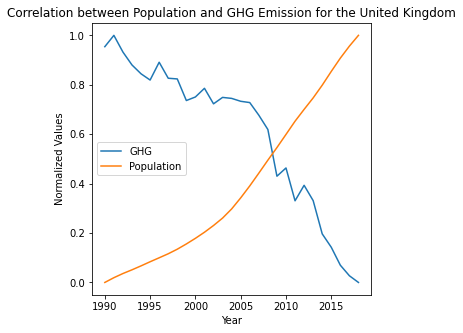

In [21]:
ghg_world = (df_ghg.loc["United Kingdom"] - min(df_ghg.loc["United Kingdom"])) / (max(df_ghg.loc["United Kingdom"]) - min(df_ghg.loc["United Kingdom"]))
pop_world = (df_pop.loc["United Kingdom"] - min(df_pop.loc["United Kingdom"])) / (max(df_pop.loc["United Kingdom"]) - min(df_pop.loc["United Kingdom"]))
plt.plot(list(range(1990, 2019)), ghg_world, label = "GHG")
plt.plot(list(range(1990, 2019)), pop_world, label = "Population")
plt.xlabel("Year")
plt.ylabel("Normalized Values")
plt.title("Correlation between Population and GHG Emission for the United Kingdom")
plt.legend()

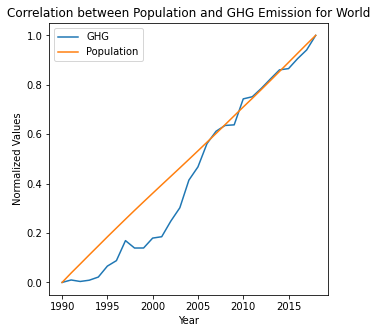

In [22]:
ghg_world = (df_ghg.loc["World"] - min(df_ghg.loc["World"])) / (max(df_ghg.loc["World"]) - min(df_ghg.loc["World"]))
pop_world = (df_pop.loc["World"] - min(df_pop.loc["World"])) / (max(df_pop.loc["World"]) - min(df_pop.loc["World"]))
plt.plot(list(range(1990, 2019)), ghg_world, label = "GHG")
plt.plot(list(range(1990, 2019)), pop_world, label = "Population")
plt.xlabel("Year")
plt.ylabel("Normalized Values")
plt.title("Correlation between Population and GHG Emission for World")
plt.legend()

Relation between Population and Greenhouse Gas Emission

There is a very high correlation between the Population of countries and the volume of greenhouse gas emissions. Moreover, this is obvious because the increase in population also increases the demand for agriculture, electricity, and transportation. Most countries show a positive correlation, but 30 countries show a negative correlation, like the United Kingdom -0.97, North Korea -0.94. Negative correlation means: on increase in population, the volume of greenhouse gas decreases. 


## Contribution of different sectors in GHG Emission

Comparison of sources of greenhouse gas in 1990 and 2018



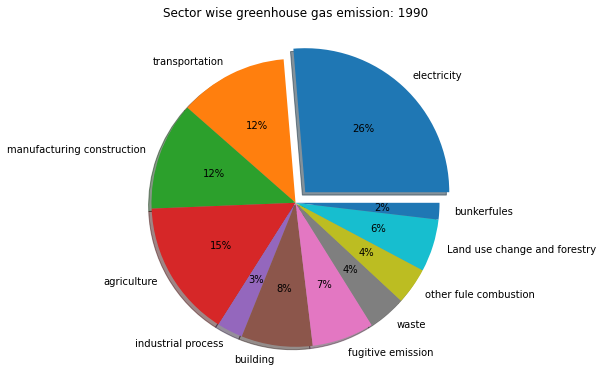

In [23]:
plt.rcParams["figure.figsize"] = (5,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
ax.axis('equal')
colors = sns.color_palette('pastel')[0:5]
ax.pie(df_ghg_sector["1990"].to_list(), labels = df_ghg_sector.index.to_list(), shadow=True, explode = explode, autopct='%.0f%%')
plt.title("Sector wise greenhouse gas emission: 1990")
plt.show()

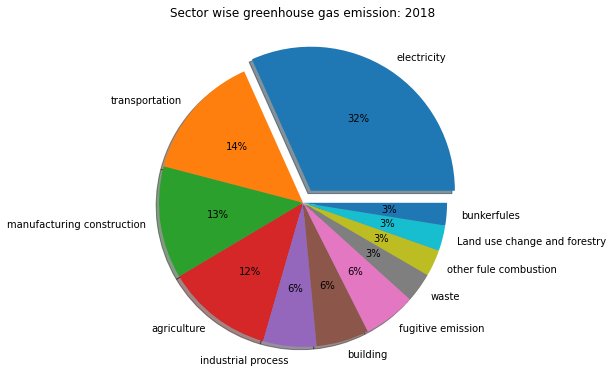

In [24]:
plt.rcParams["figure.figsize"] = (5,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
ax.axis('equal')
colors = sns.color_palette('pastel')[0:5]
ax.pie(df_ghg_sector["2018"].to_list(),shadow=True, labels = df_ghg_sector.index.to_list(),explode= explode,  autopct='%.0f%%')
plt.title("Sector wise greenhouse gas emission: 2018")
plt.show()

From the about two Pie Chart contribution of Electricty is around 26% for the year 1990 and this rises to upto 32% in the year 2018.<br>
Total of 71% green house gas emission comes from 4 sectors
1. Electricity
2. Transportaion
3. Manufacturing Construction
4. Agriculture

For the last 28 years, GHG emission by electricity sector is increased significantly by 6 percent.


## Finding the Rate of GHG Emission for last 10 years

The volume of greenhouse gas emissions by countries is not constant every year. For countries like China, it shows an increasing pattern, and for Bulgaria, it decreases. This analysis aims to determine the rate at which their greenhouse gas emission has changed in the last ten years. Six countries have doubled the emission of greenhouse gases. On the other side, 38 countries have reduced their total ghg emission from 2008 to 2018. The most significant change has been seen in the Solomon Islands and Latvia. Their total greenhouse gas emission increased by 18 and 12 times respectively from 2008. Whereas North Korea, Syria, and Ghana reduce their ghg emission by more than 50 percent.

In [25]:
df_rate_dict = {"Country" : [],
          "Rate" : []}

for country in df_ghg.index.to_list():
    previous = df_ghg.loc[country]["2008"]
    current = df_ghg.loc[country]["2018"]
    if (current - previous) < 5 and (current - previous) > -5:
        continue
    rate = (current - previous) * (100 / abs(previous))
    
    df_rate_dict["Country"].append(country)
    df_rate_dict["Rate"].append(rate)
    
df_rate = pd.DataFrame(df_rate_dict, columns=["Country", "Rate"])
df_rate.sort_values("Rate", inplace = True, ascending=False)
df_rate.index = df_rate.Country
df_rate.drop("Country", axis = 1, inplace=True)

top = df_rate[df_rate["Rate"] > 0]
bottom = df_rate[df_rate["Rate"] <= 0]

In [26]:
df_rate.to_csv("../datasets/cleaned-datasets/df_rate.csv")

##### Top Countries where rate of GHG Emission increased by  more than 100% 

In [27]:
top.head(6)

,Rate
Country,
Solomon Islands,1801.639344
Latvia,1201.162791
Zimbabwe,236.481900
Afghanistan,212.748501
Bhutan,122.200772
Iraq,103.416899


<AxesSubplot:xlabel='Country'>

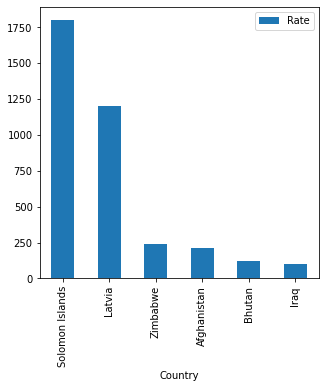

In [28]:
top.head(6).plot.bar()

In [29]:
bottom.shape

(38, 1)

##### Countries with least Rate of GHG Emission

In [30]:
bottom.tail()

,Rate
Country,
Costa Rica,-35.236082
Bulgaria,-48.955743
North Korea,-52.390962
Syria,-54.535006
Ghana,-71.910112


<AxesSubplot:xlabel='Country'>

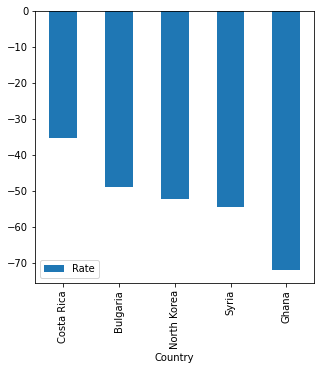

In [31]:
bottom.tail().plot.bar()

##### Overall Increase in GHG Emission from 2008

In [32]:
top.loc["World"]

Rate    13.794
Name: World, dtype: float64

# Maps

In [33]:
df_ghg_code = df_ghg.copy()
df_ghg_code["Code"] = ""
for country, code in country_code.items():
    df_ghg_code.loc[country, "Code"] = code

In [34]:
df_ghg_code = df_ghg_code.iloc[1:, :]

In [35]:
data = {"type" : "choropleth", 
            "locations" : df_ghg_code["Code"], 
            "z" : df_ghg_code['2018'], 
            "text" : df_ghg_code.index, 
            "colorscale":"Reds", 
            "colorbar" : {"title" : "Amount of GHG Emission in MtCO2"}}
layout = {"title" : "Green House Gas Emission for year 2018", 
             "geo" : {"showframe" : True,
                       "projection" : {'type' : 'natural earth1'}}}
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)   

## Sliding Graph For GHG Emission 

In [36]:
df_dict = {"Country" : [],
          "Year" : [],
          "GHG" : []}

for country in df_ghg.index.to_list():
    if country == "World":
        continue
    for year in df_ghg.columns.to_list():
        value = df_ghg.loc[country, year]
        df_dict["Country"].append(country)
        df_dict["Year"].append(year)
        df_dict["GHG"].append(value)

df_new_ghg = pd.DataFrame(df_dict, columns=["Country", "Year", "GHG"])
df_new_ghg["Code"] = ""
for country, code in country_code.items():
    df_new_ghg.loc[df_new_ghg["Country"] == country, "Code"] = code

In [37]:
data_slider = []

In [38]:
for year in df_new_ghg.Year.unique():
    df_selected = df_new_ghg[(df_new_ghg["Year"] == year) & (df_new_ghg["Country"] != "World")]
    
    for col in df_selected.columns:
        df_selected[col] = df_selected[col].astype(str)
        
    df_selected['text'] = df_selected["Country"] +  'GHG: ' + df_selected['GHG']
    
    
    data = {"type" : "choropleth", 
                "locations" : df_selected["Code"], 
                "z" : df_selected['GHG'].astype(float),
                "text" : df_selected['text'], 
                "colorscale":"Reds",
                "colorbar" : {"title" : "GHG Emission in MtCO2"}}
    
    data_slider.append(data)

C:\Users\tripa\AppData\Local\Temp/ipykernel_348/1035528725.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tripa\AppData\Local\Temp/ipykernel_348/1035528725.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
steps = []

for i in range(len(data_slider)):
    step = {"method":'restyle',
                "args":['visible', [False] * len(data_slider)],
                "label":'Year {}'.format(i + 1990)}
    step['args'][1][i] = True
    steps.append(step)

sliders = [{"active":0, "pad":{"t": 1}, "steps":steps}]  

In [40]:
layout = {"title" : "GHG", 
             "geo" : {"showframe" : True,
             "projection" : {'type' : 'natural earth1'}},
             "sliders":sliders}
fig = {"data":data_slider, "layout":layout}
plotly.offline.iplot(fig)
offline.plot(fig, auto_open=True, image = 'png', image_filename="map_us_crime_slider" ,image_width=2000, image_height=1000, 
              filename='../datasets/plots/map_us_crime_slider.html', validate=True)

'../datasets/plots/map_us_crime_slider.html'

## Dropdown Menu Graph For Gas and Sectors

In [41]:
def multi_plot(df, title, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            go.Scatter(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = {"label" : 'All',
                      "method" : 'update',
                      "args" : [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}]}

    def create_layout_button(column):
        return {"label" : column,
                    "method" : 'update',
                    "args" : [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}]}

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
         yaxis_type="log"       
    )

    fig.update_layout(
        title_text=title,
        height=500
        
    )
   
    fig.show()

In [42]:
multi_plot(df_ghg_gas.T, title="Year wise Greenhouse Gas Emission for each gases")

In [43]:
df_ghg_sector_transpose = df_ghg_sector.T
multi_plot(df_ghg_sector.T, title="Year wise Greenhouse Gas Emission for Sectors")